In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins = pd.read_csv("data/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

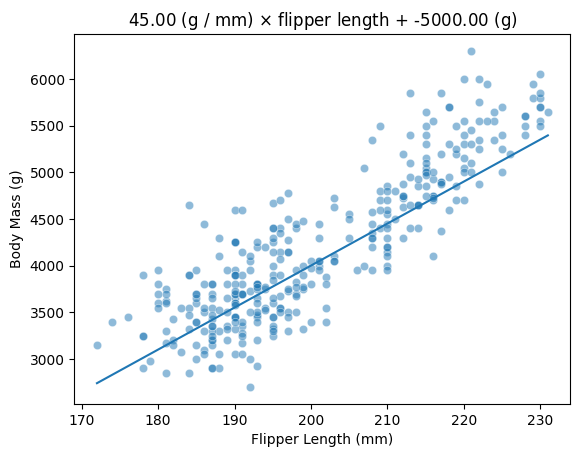

In [3]:
# Define a dummy linear model
def linear_model_flipper_mass(
    flipper_length, weight_flipper_length, intercept_body_mass
):
    body_mass = intercept_body_mass + weight_flipper_length * flipper_length
    return body_mass

weight_flipper_length = 45
intercept_body_mass = -5000

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass
)

label = "{0:.2f} (g / mm) $\\times$ flipper length + {1:.2f} (g)"
ax = sns.scatterplot(
    data=penguins,
    x=feature_name,
    y=target_name,
    alpha=0.5
)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

In [4]:
type(predicted_body_mass)

numpy.ndarray

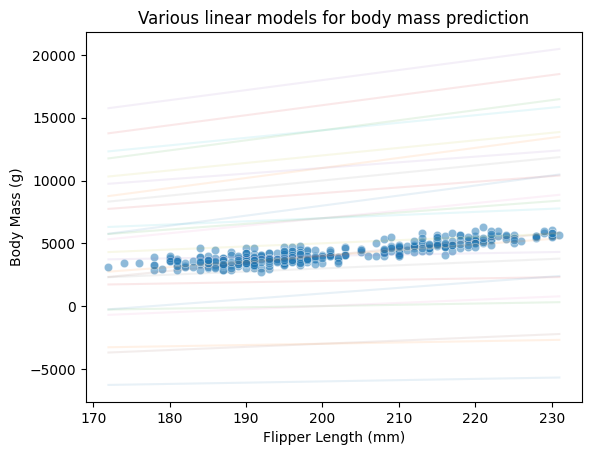

In [5]:
flipper_length_range = np.linspace(data.min(), data.max(), num=300)
weight_range = [10, 25, 45, 60, 80]
intercept_range = [-8000, -5000, -2000, 0, 2000]


ax = sns.scatterplot(
    data=penguins,
    x=feature_name,
    y=target_name,
    alpha=0.5
)

for w in weight_range:
    for intc in intercept_range:
        predicted_body_mass = linear_model_flipper_mass(
            flipper_length_range, w, intc
        )
        ax.plot(flipper_length_range, predicted_body_mass, alpha=0.1)
_ = ax.set_title("Various linear models for body mass prediction")


In [6]:
# Define a custom goodness_fit_measure (mean squared error)
def goodness_fit_measure(true_values, predictions):
    residual = true_values - predictions
    mse = np.mean(residual**2)
    return mse

In [7]:
for model_idx, (weight, intercept) in enumerate(zip(weight_range, intercept_range)):
    target_predicted = linear_model_flipper_mass(data, weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(target, np.squeeze(target_predicted)):.3f}\n")

Model #0:
10.00 (g / mm) * flipper length + -8000.00 (g)
Error: 104354194.591

Model #1:
25.00 (g / mm) * flipper length + -5000.00 (g)
Error: 17737677.266

Model #2:
45.00 (g / mm) * flipper length + -2000.00 (g)
Error: 8221236.330

Model #3:
60.00 (g / mm) * flipper length + 0.00 (g)
Error: 61847609.795

Model #4:
80.00 (g / mm) * flipper length + 2000.00 (g)
Error: 192753181.140



In [8]:
target_predicted.shape

(342, 1)

In [9]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(data, target)
linear_regression.coef_, linear_regression.intercept_

(array([49.68556641]), np.float64(-5780.831358077063))

<Axes: xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

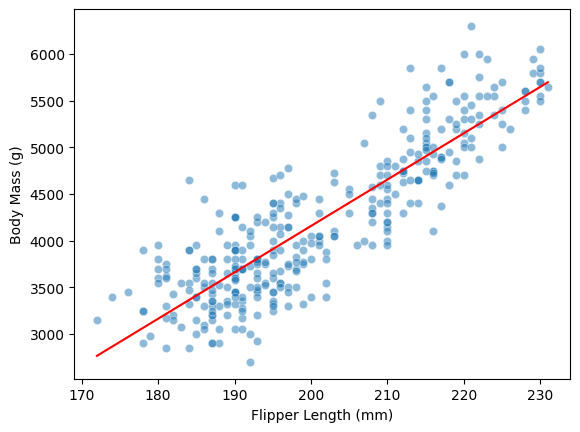

In [10]:
inferred_body_mass = linear_regression.predict(data)

sns.scatterplot(x=data[feature_name], y=target, alpha=0.5)
sns.lineplot(x=data[feature_name], y=inferred_body_mass, color='red')

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(target, inferred_body_mass)
mae = mean_absolute_error(target, inferred_body_mass)
mse, mae

(154546.18604782107, 313.0018359916962)

In [12]:
penguins.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


In [13]:
penguins = pd.read_csv("data/penguins_classification.csv")

In [14]:
# Choose only two classes of penguins for classification
penguins2 = penguins[penguins['Species'].isin(['Adelie', 'Chinstrap'])]
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"
penguins2.head()

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie


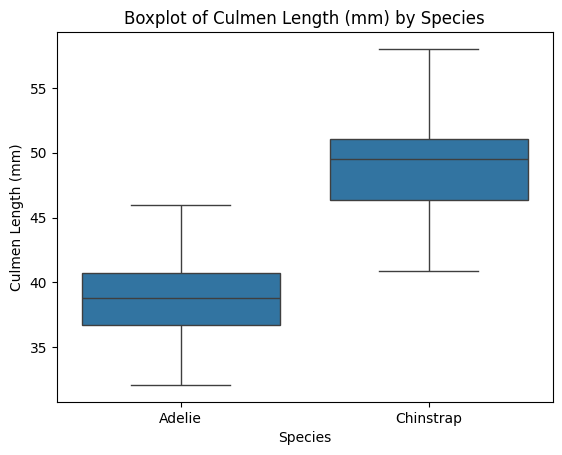

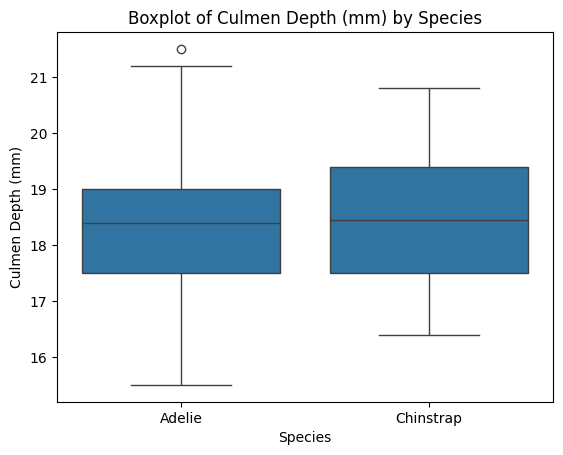

In [15]:
for feature in culmen_columns:
    plt.figure()
    sns.boxplot(x='Species', y=feature, data=penguins2)
    plt.title(f'Boxplot of {feature} by Species')

In [16]:
culmen_columns, feature_name

(['Culmen Length (mm)', 'Culmen Depth (mm)'], 'Flipper Length (mm)')

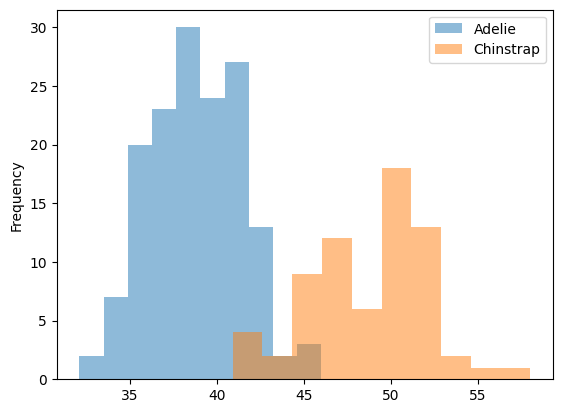

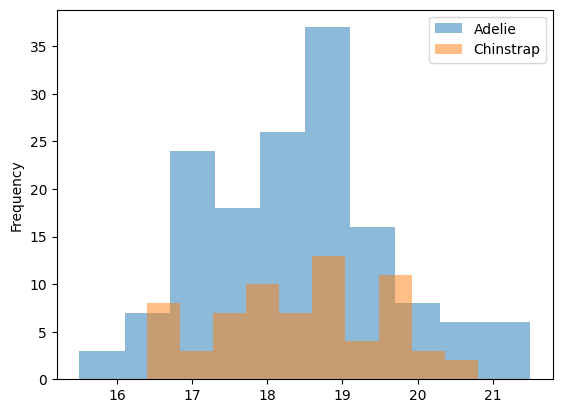

In [17]:
# Alternative plot
for feature in culmen_columns:
    plt.figure()
    penguins2.groupby('Species')[feature].plot.hist(alpha=0.5, legend=True)

In [18]:
# split the data
from sklearn.model_selection import train_test_split
penguins_train, penguins_test = train_test_split(penguins2, random_state=42)
data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]
target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

In [19]:
# Make pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression.fit(data_train, target_train)
accuracy = logistic_regression.score(data_test, target_test)
accuracy

0.9818181818181818

<Axes: xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

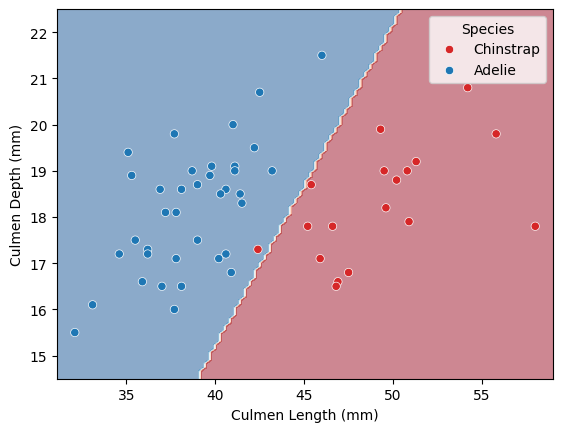

In [20]:
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    data_test,
    response_method='predict',
    cmap='RdBu_r',
    alpha=0.5
)

sns.scatterplot(
    data=penguins_test,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=['tab:red', 'tab:blue']
)

In [21]:
intercept = logistic_regression[-1].intercept_
intercept

array([-1.99404388])

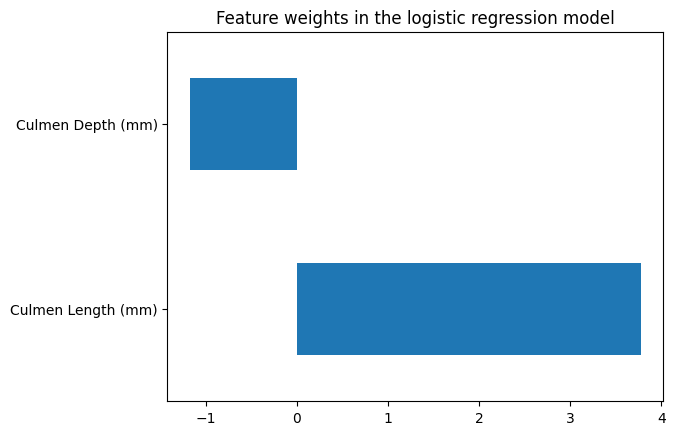

In [22]:
coefs = logistic_regression[-1].coef_[0]
weights = pd.Series(coefs, index=culmen_columns)
weights.plot.barh()
_ = plt.title("Feature weights in the logistic regression model")

In [23]:
# predicted class and probabilities
predicted_class = logistic_regression.predict(data_test)
predicted_proba = logistic_regression.predict_proba(data_test)


<Axes: xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

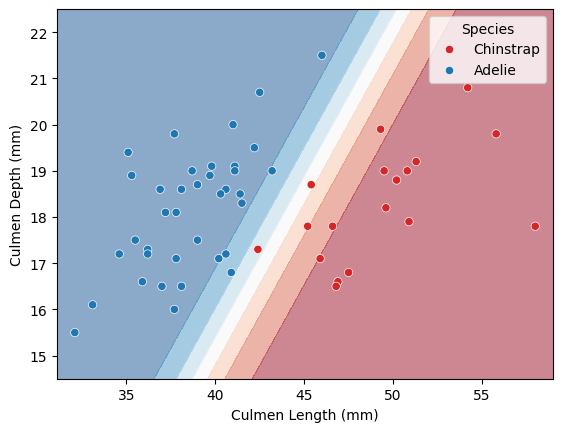

In [24]:
DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    data_test,
    response_method='predict_proba',
    cmap='RdBu_r',
    alpha=0.5
)

sns.scatterplot(
    data=penguins_test,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=['tab:red', 'tab:blue']
)

In [25]:
# Nonlinear feature engineering for linear regression

# Simulate nonlear features

rng = np.random.RandomState(42)

n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = data_max - data_min
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * 0.3
target = data**3 - 0.5*data**2 + noise
full_data = pd.DataFrame({"input_feature": data, "target": target})


<Axes: xlabel='input_feature', ylabel='target'>

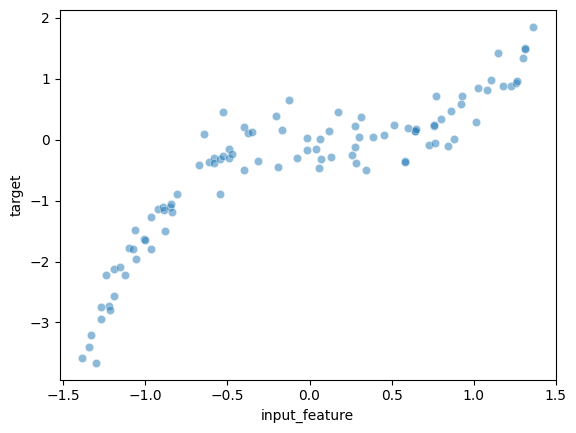

In [26]:
sns.scatterplot(
    data=full_data,
    x='input_feature',
    y='target',
    alpha=0.5,
)

In [27]:
data = data.reshape((-1, 1))
data.shape

(100, 1)

In [28]:
target.shape

(100,)

In [29]:
# Define a helper function to fix, score, and plot
def fit_score_plot_regression(model, title=None):
    model.fit(data, target)
    target_predicted = model.predict(data)
    mse = mean_squared_error(target, target_predicted)
    ax = sns.scatterplot(
        data=full_data, x='input_feature', y='target', alpha=0.5
    )
    ax.plot(data, target_predicted, color='red')
    if title is not None:
        _ = plt.title(title + f"\nMSE: {mse:.2f}")
    else:
        _ = plt.title(f"MSE: {mse:.2f}")

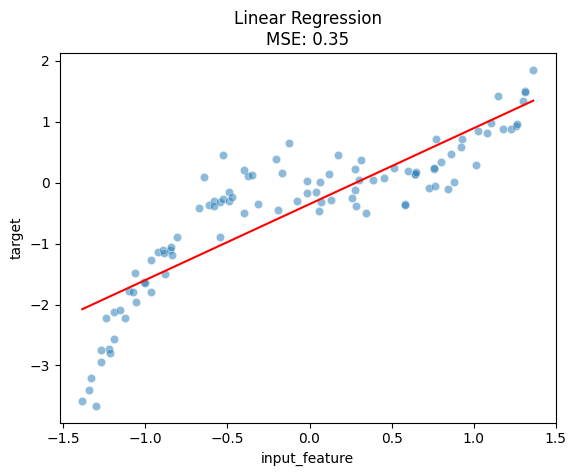

In [30]:
linear_regression = LinearRegression()
fit_score_plot_regression(linear_regression, title="Linear Regression")

In [31]:
linear_regression.coef_, linear_regression.intercept_

(array([1.24539903]), np.float64(-0.35233987534865757))

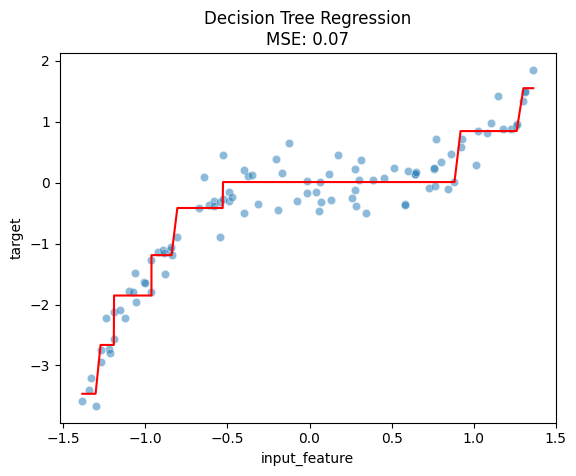

In [32]:
# First fix, using a nonlinear model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3).fit(data, target)
fit_score_plot_regression(tree, title="Decision Tree Regression")

In [33]:
# Second fix (a), creating polinomial features manually
data_expanded = np.concatenate([data, data**2, data**3], axis=1)
data_expanded.shape

(100, 3)

In [34]:
# Second fix (bZ), using PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
polynomial_expansion = PolynomialFeatures(degree=3, include_bias=False)
polynomial_expansion

,degree,3
,interaction_only,False
,include_bias,False
,order,'C'


In [35]:
polinomial_regression = make_pipeline(
    polynomial_expansion,
    LinearRegression()
)
polinomial_regression

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,False
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


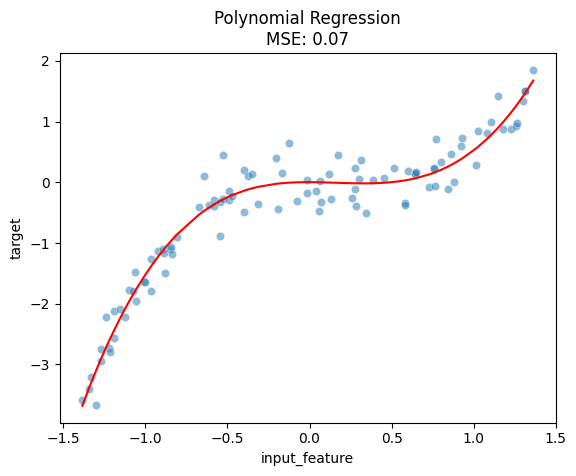

In [36]:
fit_score_plot_regression(polinomial_regression, title="Polynomial Regression")

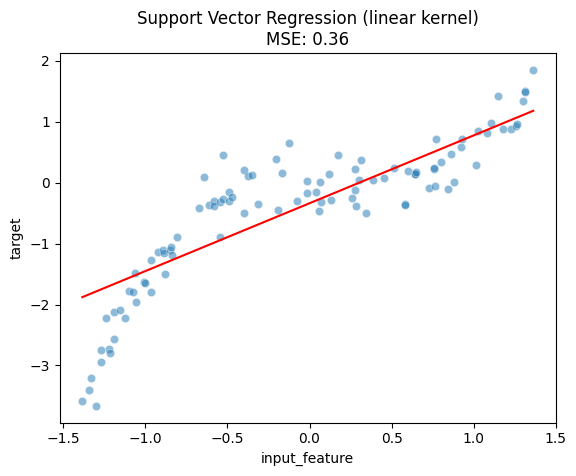

In [37]:
# third fix, using Kernel methods (from sklearn.svm import SVR)
from sklearn.svm import SVR
svr = SVR(kernel='linear')
fit_score_plot_regression(svr, title="Support Vector Regression (linear kernel)")

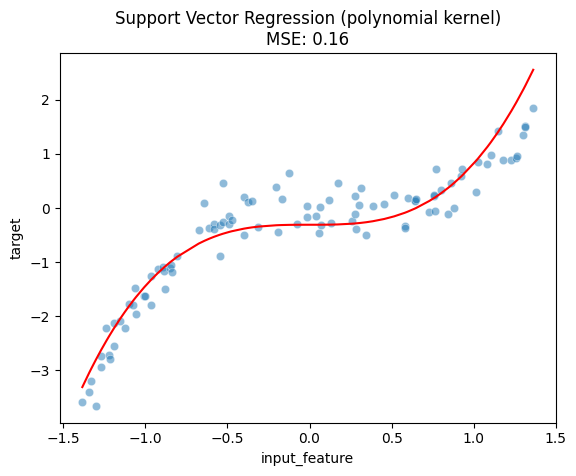

In [38]:
svr2 = SVR(kernel='poly', degree=3)
fit_score_plot_regression(svr2, title="Support Vector Regression (polynomial kernel)")

c:\ESL\Learning\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


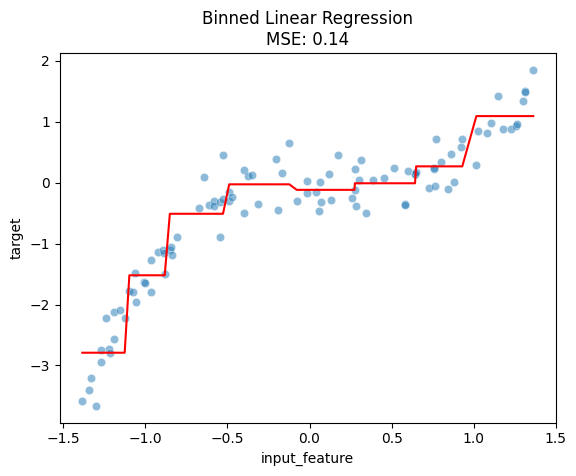

In [39]:
# binning the input feature using KBinsDiscretizer
from sklearn.preprocessing import KBinsDiscretizer
binned_regression = make_pipeline(
    KBinsDiscretizer(n_bins=8),
    LinearRegression()
)
fit_score_plot_regression(binned_regression, title="Binned Linear Regression")

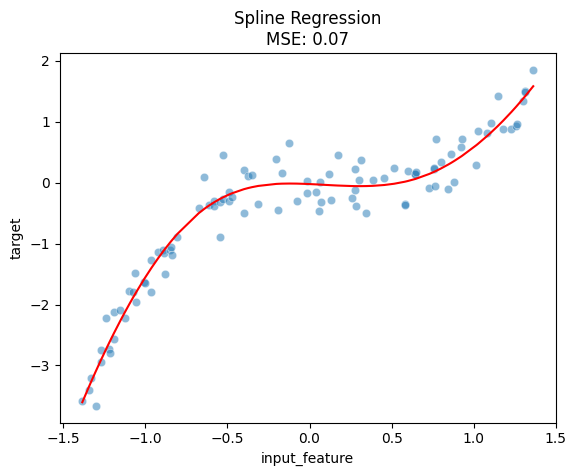

In [40]:
# Transform input features using splines
from sklearn.preprocessing import SplineTransformer
spline_regression = make_pipeline(
    SplineTransformer(degree=3, include_bias=False),
    LinearRegression()
)
fit_score_plot_regression(spline_regression, title="Spline Regression")

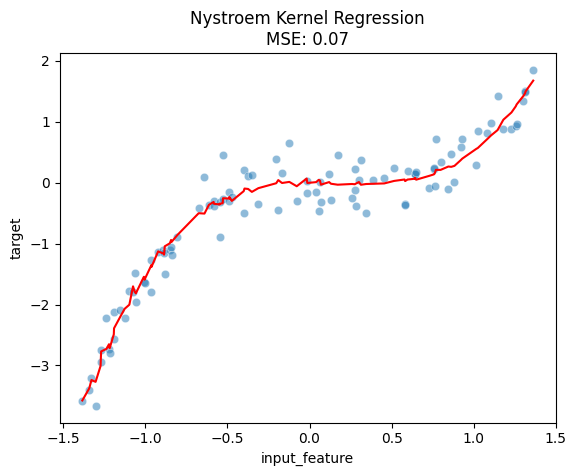

In [41]:
# A more computationally efficient alternative to PolinomialFeatures is
# to use Nystroem

from sklearn.kernel_approximation import Nystroem
nystroem_regression = make_pipeline(
    Nystroem(kernel='poly', degree=3, n_components=5, random_state=42),
    LinearRegression()
)
fit_score_plot_regression(nystroem_regression, title="Nystroem Kernel Regression")

In [42]:
penguins = pd.read_csv("data/penguins.csv")
columns = ["Flipper Length (mm)", "Culmen Length (mm)", "Culmen Depth (mm)"]
target_name = "Body Mass (g)"

# Remove lines with missing values for the columns of interest
penguins_non_missing = penguins[columns + [target_name]].dropna()

data = penguins_non_missing[columns]
target = penguins_non_missing[target_name]
data

,Flipper Length (mm),Culmen Length (mm),Culmen Depth (mm)
0,181.0,39.1,18.7
1,186.0,39.5,17.4
2,195.0,40.3,18.0
4,193.0,36.7,19.3
5,190.0,39.3,20.6
...,...,...,...
339,207.0,55.8,19.8
340,202.0,43.5,18.1
341,193.0,49.6,18.2
342,210.0,50.8,19.0


In [43]:
# train a linear regression model on the penguins dataset  
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

# Cross validation (10 folds) with MAE metric
from sklearn.model_selection import cross_validate
cv_results = cross_validate(linear_regression, data, target, cv=10, scoring='neg_mean_absolute_error')
cv_results['test_score'] = -cv_results['test_score']
cv_results['test_score'].mean(), cv_results['test_score'].std()

(np.float64(337.0713373844393), np.float64(84.86840942516267))

In [44]:
# Set up a pipeline with polynomial features and linear regression
from sklearn.preprocessing import PolynomialFeatures    
from sklearn.pipeline import make_pipeline
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=True, 
                       include_bias=False).set_output(transform="pandas"),
    LinearRegression()
)

In [45]:
# Transform the first 5 rows of data to understand how PolynomialFeatures works
sample = polynomial_regression.named_steps['polynomialfeatures'].fit_transform(data)
sample.head()

,Flipper Length (mm),Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm) Culmen Length (mm),Flipper Length (mm) Culmen Depth (mm),Culmen Length (mm) Culmen Depth (mm)
0,181.0,39.1,18.7,7077.1,3384.7,731.17
1,186.0,39.5,17.4,7347.0,3236.4,687.30
2,195.0,40.3,18.0,7858.5,3510.0,725.40
4,193.0,36.7,19.3,7083.1,3724.9,708.31
5,190.0,39.3,20.6,7467.0,3914.0,809.58


In [46]:
# Manually compute the first interaction term
sample_interaction = data['Flipper Length (mm)'] * data['Culmen Length (mm)']
(sample_interaction - sample['Flipper Length (mm) Culmen Length (mm)']).head()

0    0.0
1    0.0
2    0.0
4    0.0
5    0.0
dtype: float64

In [47]:
cv_results = cross_validate(polynomial_regression, data, target, cv=10, scoring='neg_mean_absolute_error')
cv_results['test_score'] = -cv_results['test_score']
cv_results['test_score'].mean(), cv_results['test_score'].std()

(np.float64(301.78955228432346), np.float64(44.340007819398856))

In [48]:
# Using GridSearchCV to find the optimal poly degree of Nystroem

param_range = np.array([5, 10, 50, 100])
from sklearn.model_selection import GridSearchCV
nystroem_grid = GridSearchCV(
    estimator=make_pipeline(
        Nystroem(kernel='poly', degree=3, random_state=42),
        LinearRegression()
    ),
    param_grid={'nystroem__n_components': param_range},
    cv=10,
    scoring='neg_mean_absolute_error'
)


In [49]:
cv_results = cross_validate(nystroem_grid, data, target, cv=10, scoring='neg_mean_absolute_error')
cv_results['test_score'] = -cv_results['test_score']
cv_results['test_score'].mean(), cv_results['test_score'].std()

(np.float64(302.60331105981925), np.float64(45.579888206815234))

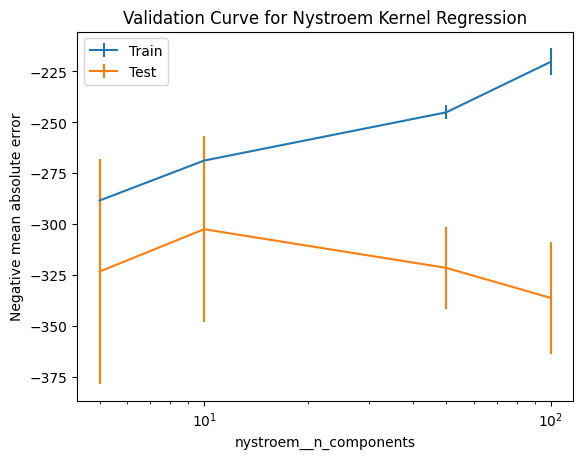

In [50]:
# Use ValidationCurveDisplay to assess the effect of n_components on MAE
from sklearn.model_selection import ValidationCurveDisplay
nystroem_regression = make_pipeline(
    Nystroem(kernel='poly', degree=3, random_state=42),
    LinearRegression()  
)

disp = ValidationCurveDisplay.from_estimator(
    nystroem_regression,
    data,
    target,
    param_name='nystroem__n_components',
    param_range=param_range,
    cv=10,
    scoring='neg_mean_absolute_error',
    std_display_style='errorbar',
    n_jobs=-1
)
_ = plt.title("Validation Curve for Nystroem Kernel Regression")

In [51]:
# Nonlinear feature engineering for logistic regression
# Simulate three nonlinear datasets for classification
from sklearn.datasets import make_moons, make_gaussian_quantiles
feature_names = ['Feature1', 'Feature2']
target_name = 'class'

X, y = make_moons(n_samples=100, noise=0.13, random_state=42)
moons = pd.DataFrame(
    np.concatenate([X, y[:, np.newaxis]], axis=1),
    columns=feature_names + [target_name],
)
data_moons, target_moons = moons[feature_names], moons[target_name]
data_moons.shape, target_moons.shape

((100, 2), (100,))

In [52]:
X, y = make_gaussian_quantiles(
    n_samples=100, n_features=2, n_classes=3, random_state=42
)
gauss = pd.DataFrame(
    np.concatenate([X, y[:, np.newaxis]], axis=1),
    columns=feature_names + [target_name],
)
data_gauss, target_gauss = gauss[feature_names], gauss[target_name]
data_gauss.shape, target_gauss.shape

((100, 2), (100,))

In [53]:
xor = pd.DataFrame(
    np.random.RandomState(42).uniform(low=-1, high=1, size=(100, 2)),
    columns=feature_names
)
target_xor = np.logical_xor(xor['Feature1'] < 0, xor['Feature2'] < 0).astype(np.int32)
xor['class'] = target_xor
data_xor = xor[feature_names]
target_xor = xor['class']
data_xor.shape, target_xor.shape

((100, 2), (100,))

[Text(0.5, 1.0, 'The XOR dataset'), Text(0.5, 0, 'Feature1')]

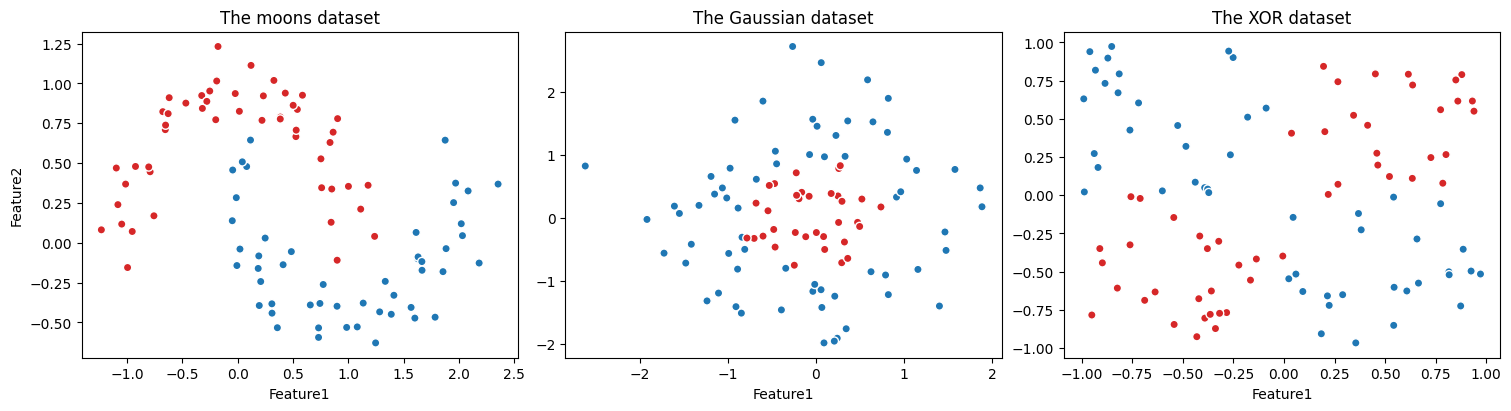

In [54]:
# Plot the three datasets
from matplotlib.colors import ListedColormap
fig, axs = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)

common_scatter_plot_params = dict(
    cmap=ListedColormap(['tab:red', 'tab:blue']),
    edgecolor='white',
    linewidth=1,
)

axs[0].scatter(
    data_moons['Feature1'],
    data_moons['Feature2'],
    c=target_moons,
    **common_scatter_plot_params
)

axs[1].scatter(
    data_gauss['Feature1'],
    data_gauss['Feature2'],
    c=target_gauss,
    **common_scatter_plot_params
)

axs[2].scatter(
    data_xor['Feature1'],
    data_xor['Feature2'],
    c=target_xor,
    **common_scatter_plot_params
)

axs[0].set(
    title="The moons dataset",
    xlabel=feature_names[0],
    ylabel=feature_names[1]
)

axs[1].set(
    title="The Gaussian dataset",
    xlabel=feature_names[0],
)

axs[2].set(
    title="The XOR dataset",
    xlabel=feature_names[0],
)


In [55]:
# Define a helper function to plot decision boundaries
def plot_decision_boundary(model, title=None):
    datasets = [
        (data_moons, target_moons),
        (data_gauss, target_gauss),
        (data_xor, target_xor)
    ]
    fig, axs = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)
    
    for i, ax, (data, target) in zip(
        range(len(datasets)), axs, datasets
    ):
        model.fit(data, target)
        # Decision boundary plot
        DecisionBoundaryDisplay.from_estimator(
            model, data,
            response_method='predict_proba',
            alpha=0.5,
            vmin=0, vmax=1,
            ax=ax
        )
        # Decision boundary line plot
        DecisionBoundaryDisplay.from_estimator(
            model, data,
            response_method='predict_proba',
            plot_method='contour',
            alpha=0.5,
            levels=[0.5],
            linestyles='dashed',
            linewidths=2,
            ax=ax
        )
        ax.scatter(
            data['Feature1'],
            data['Feature2'],
            c=target,
            **common_scatter_plot_params
        )
        if i > 0:
            ax.set_ylabel('')
        if title is not None:
            fig.suptitle(title)

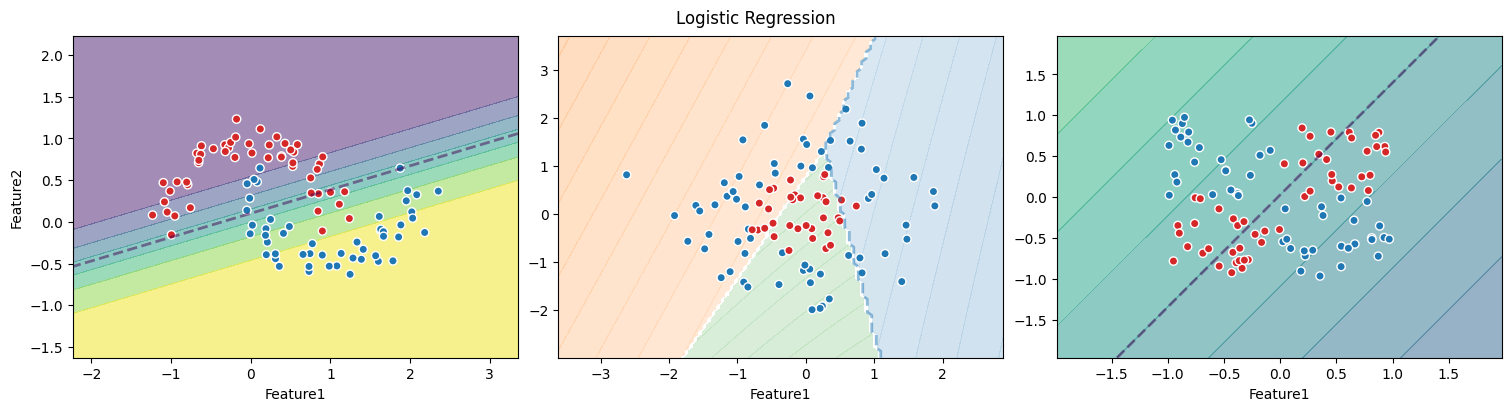

In [56]:
logistic_regression = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)
plot_decision_boundary(logistic_regression, title="Logistic Regression")

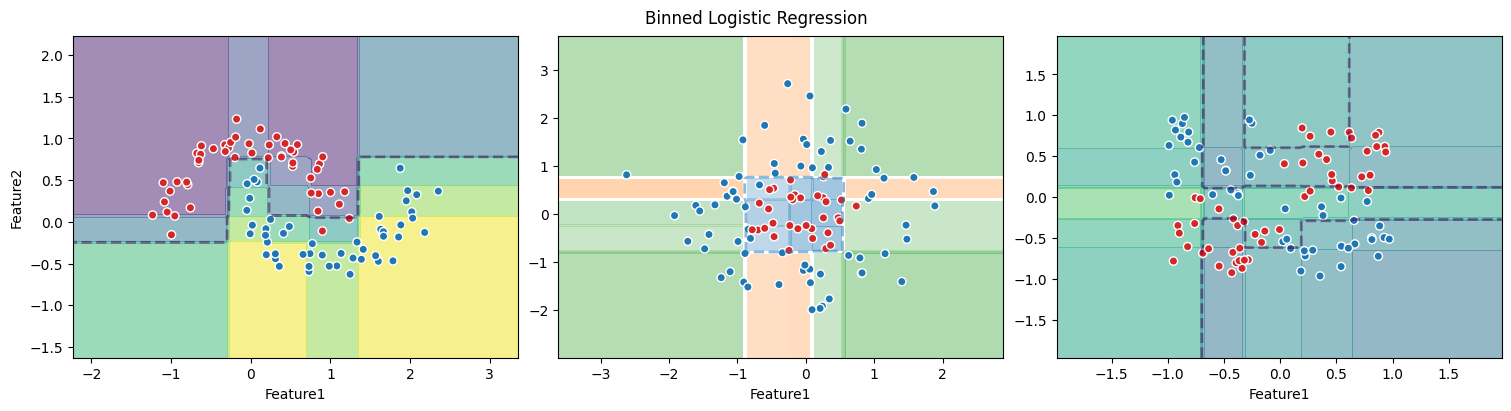

In [57]:
# Binning the input features using KBinsDiscretizer
# feature-wise transformation/cannot capture interactions between features
from sklearn.preprocessing import KBinsDiscretizer
classifier_binned = make_pipeline(
    KBinsDiscretizer(n_bins=5, encode='onehot', quantile_method='averaged_inverted_cdf'),
    LogisticRegression()
)
plot_decision_boundary(classifier_binned, title="Binned Logistic Regression")

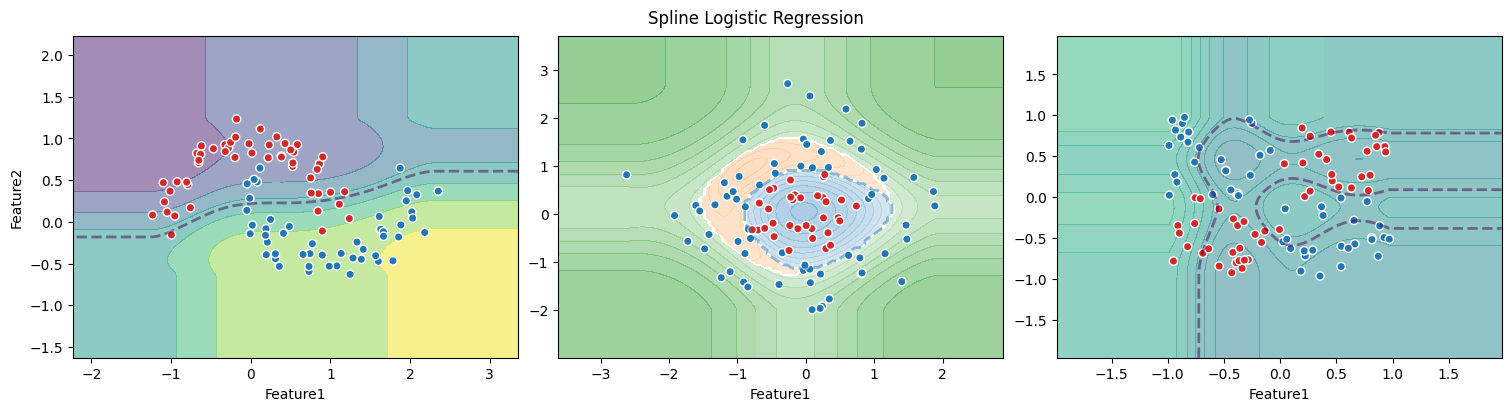

In [58]:
# Spline feature transformation
# feature-wise transformation/cannot capture interactions between features
from sklearn.preprocessing import SplineTransformer
classifier_spline = make_pipeline(
    SplineTransformer(degree=3, n_knots=5),
    LogisticRegression()
)
plot_decision_boundary(classifier_spline, title="Spline Logistic Regression")

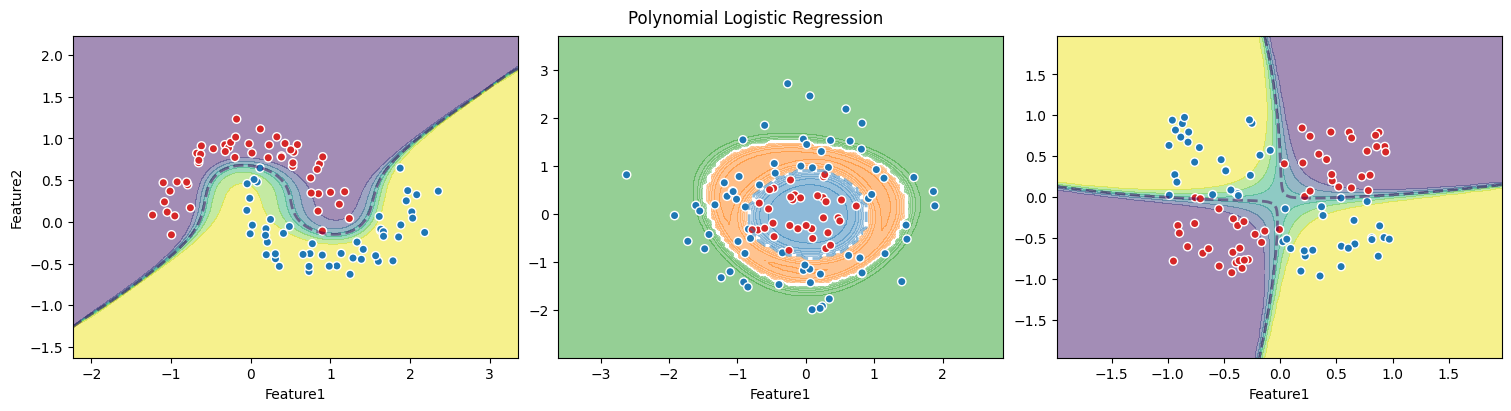

In [59]:
# Polynomial feature transformation
# can capture feature interactions
classiifier_polynomial = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=3, interaction_only=False, include_bias=False),
    LogisticRegression(C=10)
)
plot_decision_boundary(classiifier_polynomial, title="Polynomial Logistic Regression")

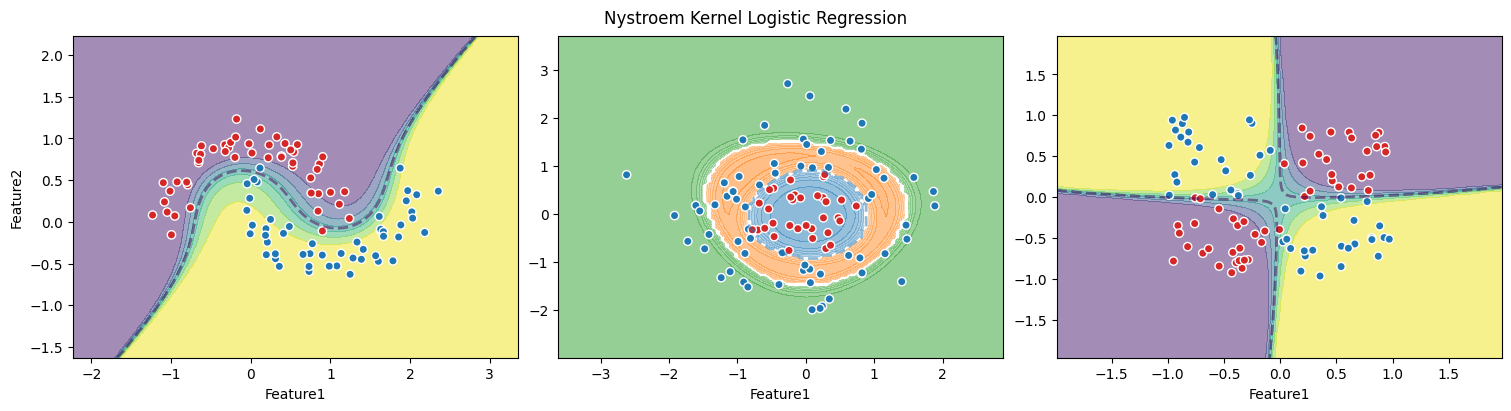

In [60]:
# Kernel approximation using Nystroem
# can capture feature interactions
classifier_nystroem = make_pipeline(
    StandardScaler(),
    Nystroem(kernel='poly', degree=3, n_components=10, random_state=42),
    LogisticRegression(C=10)
)
plot_decision_boundary(classifier_nystroem, title="Nystroem Kernel Logistic Regression")

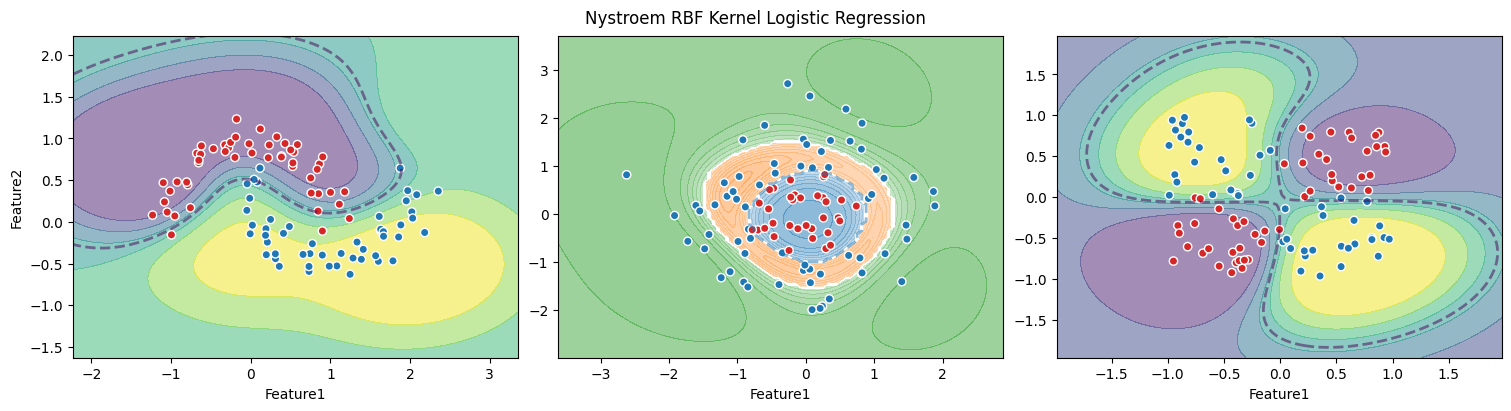

In [61]:
# Let's try Nystroem with RBF kernel
classifier_nystroem_rbf = make_pipeline(
    StandardScaler(),
    Nystroem(kernel='rbf', gamma=0.5, n_components=10, random_state=42),
    LogisticRegression(C=10)
)
plot_decision_boundary(classifier_nystroem_rbf, title="Nystroem RBF Kernel Logistic Regression")

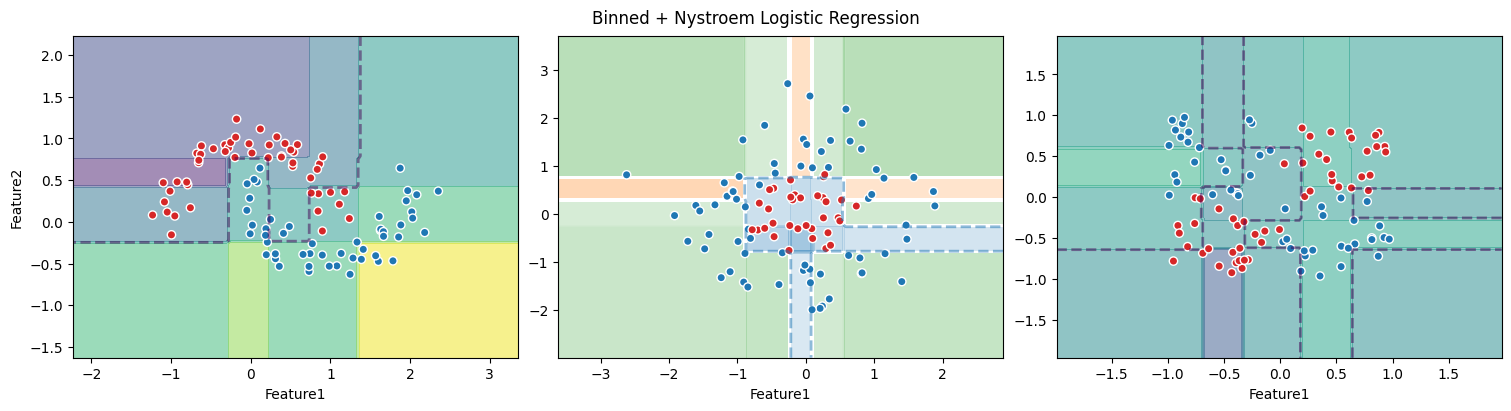

In [62]:
# Multi-step feature engineering for logistic regression
# Combining KBinsDiscretizer and Nystroem
classifier_binned_nystroem = make_pipeline(
    KBinsDiscretizer(n_bins=5, quantile_method='averaged_inverted_cdf'),
    Nystroem(kernel='rbf', gamma=0.5, n_components=10, random_state=42),
    LogisticRegression()
)
plot_decision_boundary(classifier_binned_nystroem, title="Binned + Nystroem Logistic Regression")

In [63]:
import pandas as pd

adult_census = pd.read_csv("data/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

model_census = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

cv_census = cross_validate(
    model_census,
    data,
    target,
    cv=10,
    scoring='accuracy',
    return_estimator=True,
    n_jobs=-1
)

cv_census['test_score'].mean(), cv_census['test_score'].std()

(np.float64(0.7998650409039354), np.float64(0.0037395111246827104))

<Axes: >

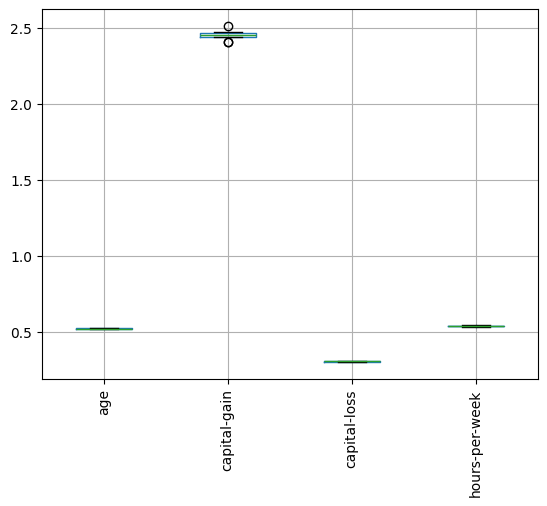

In [65]:
# Boxplot of feature coefficient, with variablility across the cross-validation folds
import pandas as pd
coefficients = pd.DataFrame(
    [
        estimator.named_steps['logisticregression'].coef_.flatten()
        for estimator in cv_census['estimator']
    ],
    columns=data.columns
)
coefficients.boxplot(rot=90)

In [66]:
cv_census['estimator']

[Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', Stan

In [67]:
adult_census = pd.read_csv("data/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select numerical and categorical columns
numerical_columns = data.select_dtypes(include=['integer', 'floating']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_transformer = make_pipeline(
    StandardScaler()
)
categorical_transformer = make_pipeline(
    OneHotEncoder(min_frequency=0.01, handle_unknown='ignore', sparse_output=False)
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_columns),
        ("cat", categorical_transformer, categorical_columns)
    ]
)

model_census_full = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=1000))
    ]
)

cv_census_full = cross_validate(
    model_census_full,
    data,
    target,
    cv=10,
    return_estimator=True,
    n_jobs=-1,
    scoring='accuracy'
)

cv_census_full['test_score'].mean(), cv_census_full['test_score'].std()

(np.float64(0.8512140995559625), np.float64(0.0035306295354508286))

In [69]:
model_census_full.fit(data, target)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [70]:
preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [71]:
feature_names = (
    preprocessor.named_transformers_["cat"].get_feature_names_out(
        categorical_columns
    )
).tolist()
feature_names += numerical_columns
feature_names

['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_infrequent_sklearn',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Prof-school',
 'education_ Some-college',
 'education_infrequent_sklearn',
 'marital-status_ Divorced',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'marital-status_infrequent_sklearn',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Ma

In [72]:
# Extract feature coefficients from the trained model
classifier = model_census_full.named_steps['classifier']
coefficients = pd.Series(
    classifier.coef_.flatten(),
    index=feature_names
)
coefficients = np.abs(coefficients).sort_values(ascending=False)
coefficients.head(10)

workclass_ Federal-gov                2.338722
education_ Some-college               1.834634
marital-status_ Married-civ-spouse    1.798330
marital-status_ Never-married         1.763894
marital-status_ Widowed               1.493445
education_ Bachelors                  1.376684
marital-status_ Divorced              1.290008
education_ Doctorate                  1.194971
education_ Assoc-voc                  1.178323
occupation_ ?                         1.107806
dtype: float64

In [73]:
# Add a PolynomialFeatures step to the preprocessor
from sklearn.preprocessing import PolynomialFeatures
model_census_full_poly = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("polynomial", PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
        ("classifier", LogisticRegression(max_iter=1000))
    ]
)

cv_census_full_poly = cross_validate(
    model_census_full,
    data,
    target,
    cv=10,
    return_estimator=True,
    n_jobs=-1,
    scoring='accuracy'
)

cv_census_full_poly['test_score'].mean(), cv_census_full_poly['test_score'].std()

(np.float64(0.8512140995559625), np.float64(0.0035306295354508286))